This is a time forecasting for oil production values

In [1]:
#importing analysis libraries
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import numpy as np #linear algebra
import seaborn as sns #plotting
from prophet import Prophet #time series predition library
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric


In [2]:
pd.options.display.max_seq_items = None
path_to_data = '/Users/samaalnassiry/Desktop/Crude Oil Analysis/clean-wide-final.csv'
open_data = pd.read_csv(path_to_data)
open_data.head() #reading first few rows

,_LOCATION_,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag_Codes,country,total_prod_value
0,Angola,OILPROD,TOT,KTOE,A,2015,90844.0115,NaN,AGO,1.531998e+06
1,Angola,OILPROD,TOT,KTOE,A,2001,37234.6504,NaN,AGO,1.531998e+06
2,Angola,OILPROD,TOT,KTOE,A,2003,44651.1548,NaN,AGO,1.531998e+06
3,Angola,OILPROD,TOT,KTOE,A,2013,87578.8709,NaN,AGO,1.531998e+06
4,Angola,OILPROD,TOT,KTOE,A,2019,66442.8144,NaN,AGO,1.531998e+06


In [3]:
def country_selector(x): #function that parses through the dataframe to return only data from one country
  internal_country = open_data.loc[open_data['_LOCATION_']==x]
  time_val = internal_country[['TIME','Value']].sort_values(by='TIME', ascending=True) #pulls time 
  #and production value
 #returns by time ascending
  roc_time_val = time_val.Value.pct_change() #calculates the rate of change of production
  time_val.insert(2,'Change',roc_time_val,True) #appends the ROC
  return time_val

country = country_selector('Iraq')
print(country)


     TIME        Value    Change
896  2001  130468.4147       NaN
884  2002  112364.3684 -0.138762
899  2003   78361.8659 -0.302609
897  2004  102709.2863  0.310705
882  2005   94832.1797 -0.076693
894  2006   98617.2829  0.039914
891  2007  102606.9862  0.040456
879  2008  113803.7307  0.109123
893  2009  118026.6782  0.037107
892  2010  118535.1096  0.004308
883  2011  133541.5092  0.126599
898  2012  149082.9383  0.116379
889  2013  149165.8014  0.000556
880  2014  157034.7240  0.052753
881  2015  176252.8181  0.122381
890  2016  222635.6771  0.263161
885  2017  224791.0151  0.009681
886  2018  229565.2486  0.021239
887  2019  236801.9813  0.031524
888  2020  204040.3440 -0.138350
895  2021  202630.6027 -0.006909


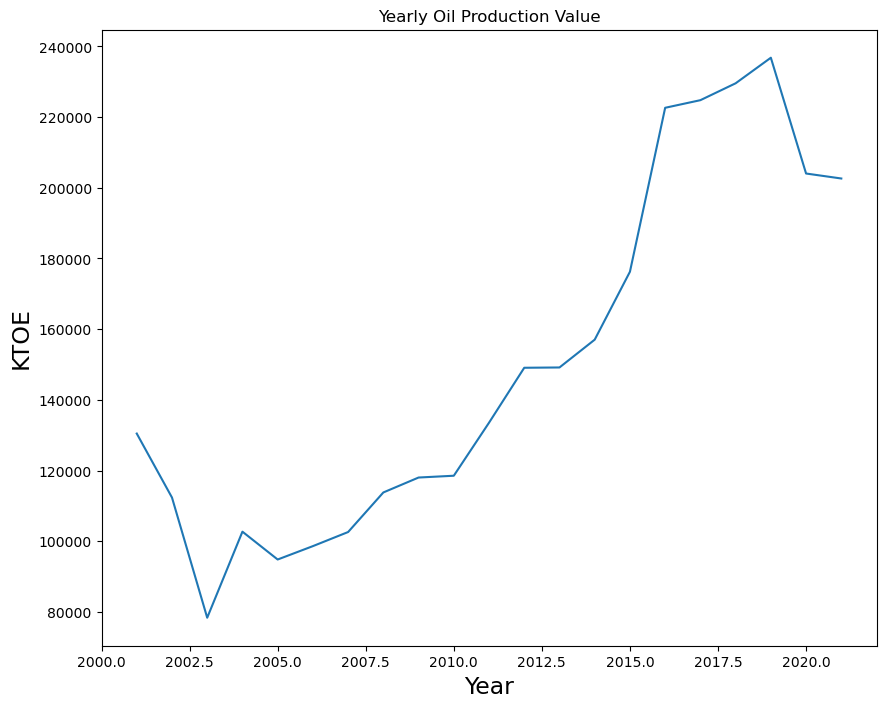

In [4]:
#Time vs production line plot
plt.figure(figsize=(10,8))
sns.lineplot(data=country, x = 'TIME' , y = 'Value')
plt.xlabel('Year', fontsize='17', horizontalalignment='center')
plt.ylabel('KTOE',fontsize='17', horizontalalignment='center')
plt.title('Yearly Oil Production Value')
plt.show()

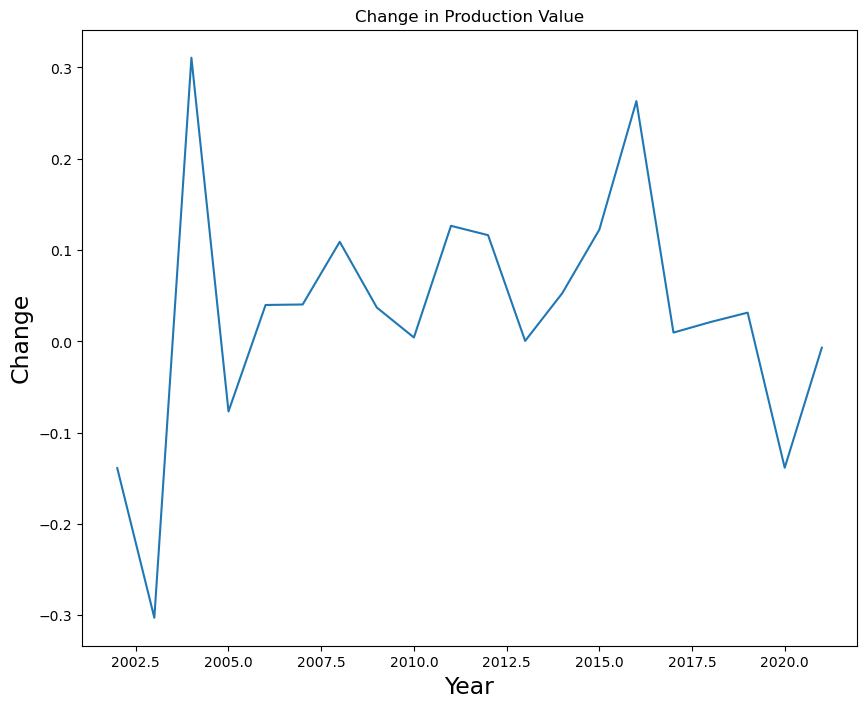

In [5]:
#Time vs production change line plot
plt.figure(figsize=(10,8))
sns.lineplot(data=country, x = 'TIME' , y = 'Change')
plt.xlabel('Year', fontsize='17', horizontalalignment='center')
plt.ylabel('Change',fontsize='17', horizontalalignment='center')
plt.title('Change in Production Value')
plt.show()


In [6]:
country = country.rename(columns = {'TIME':'ds','Value':'y'}) #converting values to fit prophet
print(country.head())
#Time series model
model = Prophet()
model.fit(country[['ds','y']])


       ds            y    Change
896  2001  130468.4147       NaN
884  2002  112364.3684 -0.138762
899  2003   78361.8659 -0.302609
897  2004  102709.2863  0.310705
882  2005   94832.1797 -0.076693


00:30:39 - cmdstanpy - INFO - Chain [1] start processing
00:30:39 - cmdstanpy - INFO - Chain [1] done processing


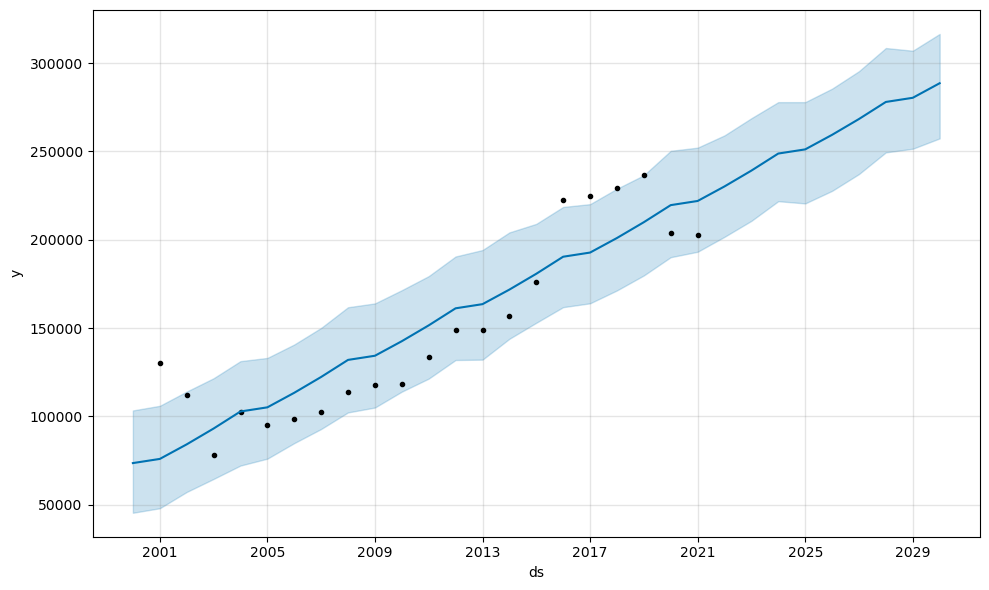

In [8]:
#Future dataframe
future = model.make_future_dataframe(periods=60,freq='Y')

forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)
forecast.drop(forecast.index[:50],inplace=True)


fig1 = model.plot(forecast)
